Distribution of all Features......


C:\ProgramData\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

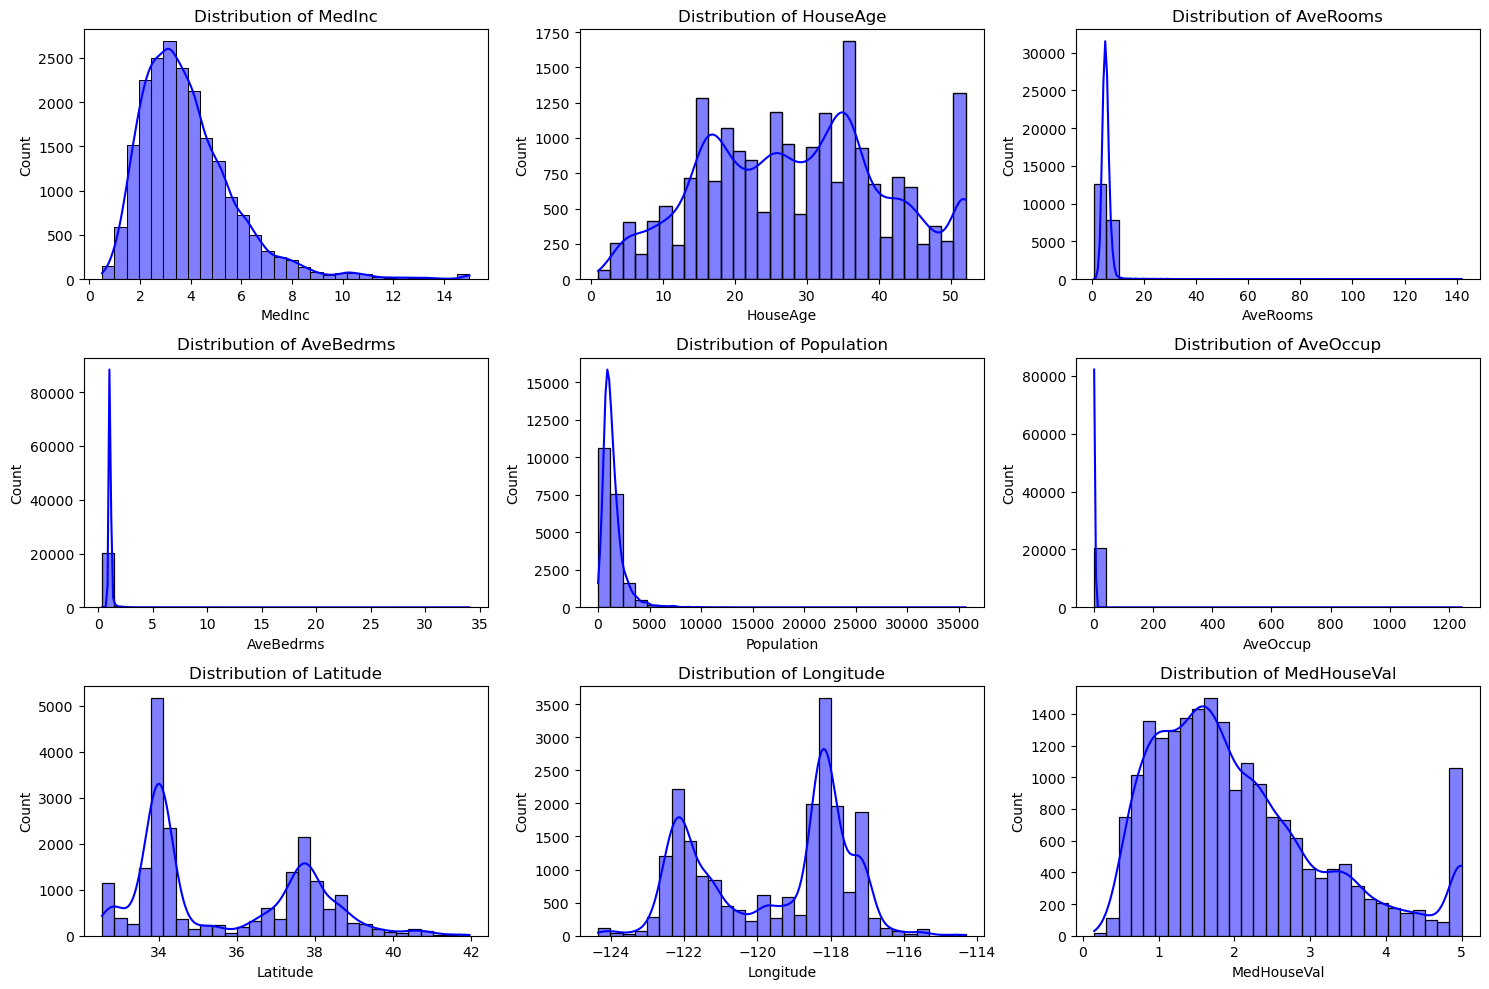

Box plot of all features.....


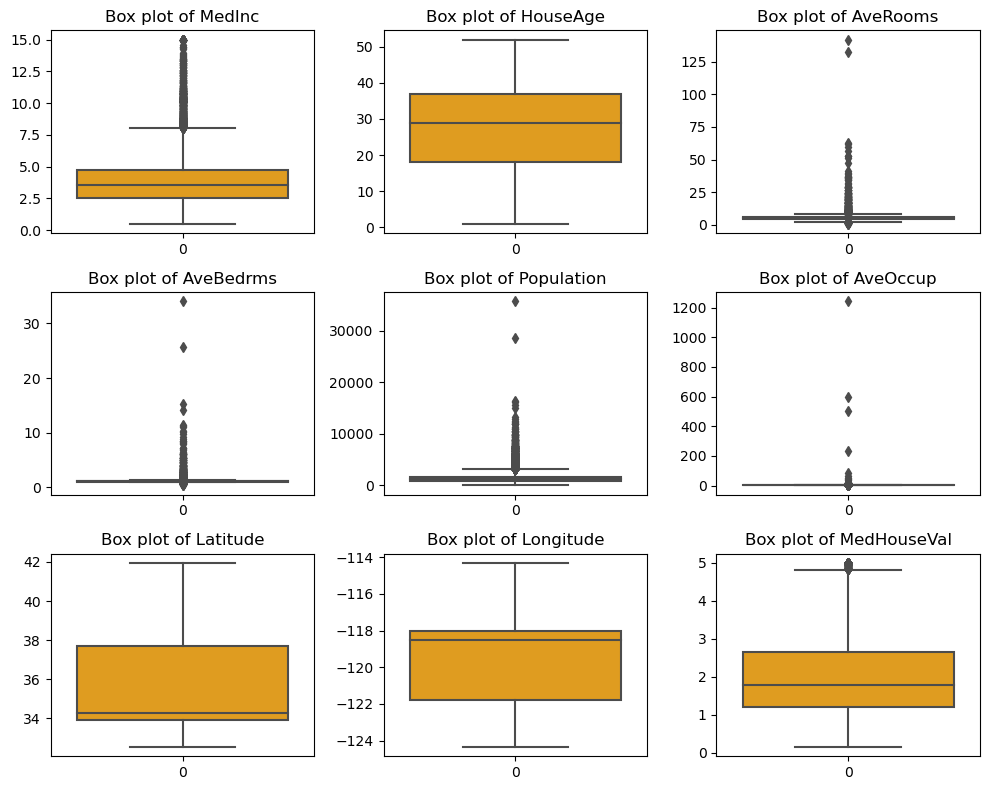

Outlier Information...
 The outlier of MedInc is 681
 The outlier of HouseAge is 0
 The outlier of AveRooms is 511
 The outlier of AveBedrms is 1424
 The outlier of Population is 1196
 The outlier of AveOccup is 711
 The outlier of Latitude is 0
 The outlier of Longitude is 0
 The outlier of MedHouseVal is 1071


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
housing_df = data.frame

numerical_features = housing_df.select_dtypes(include=[np.number]).columns

print("Distribution of all Features......")

plt.figure(figsize=(15,10))

for i,feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.histplot(housing_df[feature],kde=True,color='blue',bins=30)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

print("Box plot of all features.....")

plt.figure(figsize=(10,8))

for i,feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    plt.title(f'Box plot of {feature}')
    sns.boxplot(housing_df[feature],color='orange')
    plt.tight_layout()
plt.show()

print("Outlier Information...")

outlier_su={}
for feature in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = housing_df[(housing_df[feature] < lower_bound) | (housing_df[feature]>upper_bound)]
    outlier_su[feature] = len(outliers)
    print(f' The outlier of {feature} is {len(outliers)}')
    

Correlation of All features... 


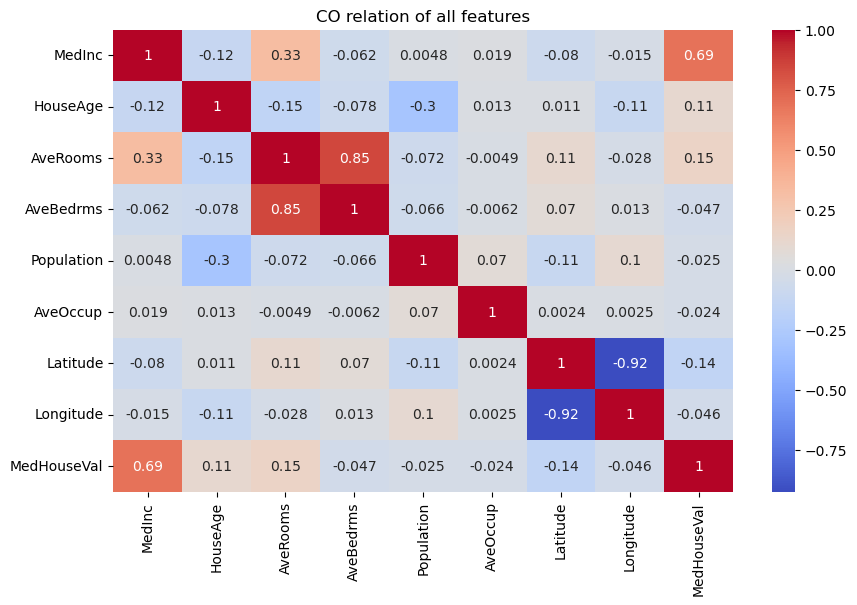

C:\ProgramData\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Figure size 1800x1800 with 0 Axes>

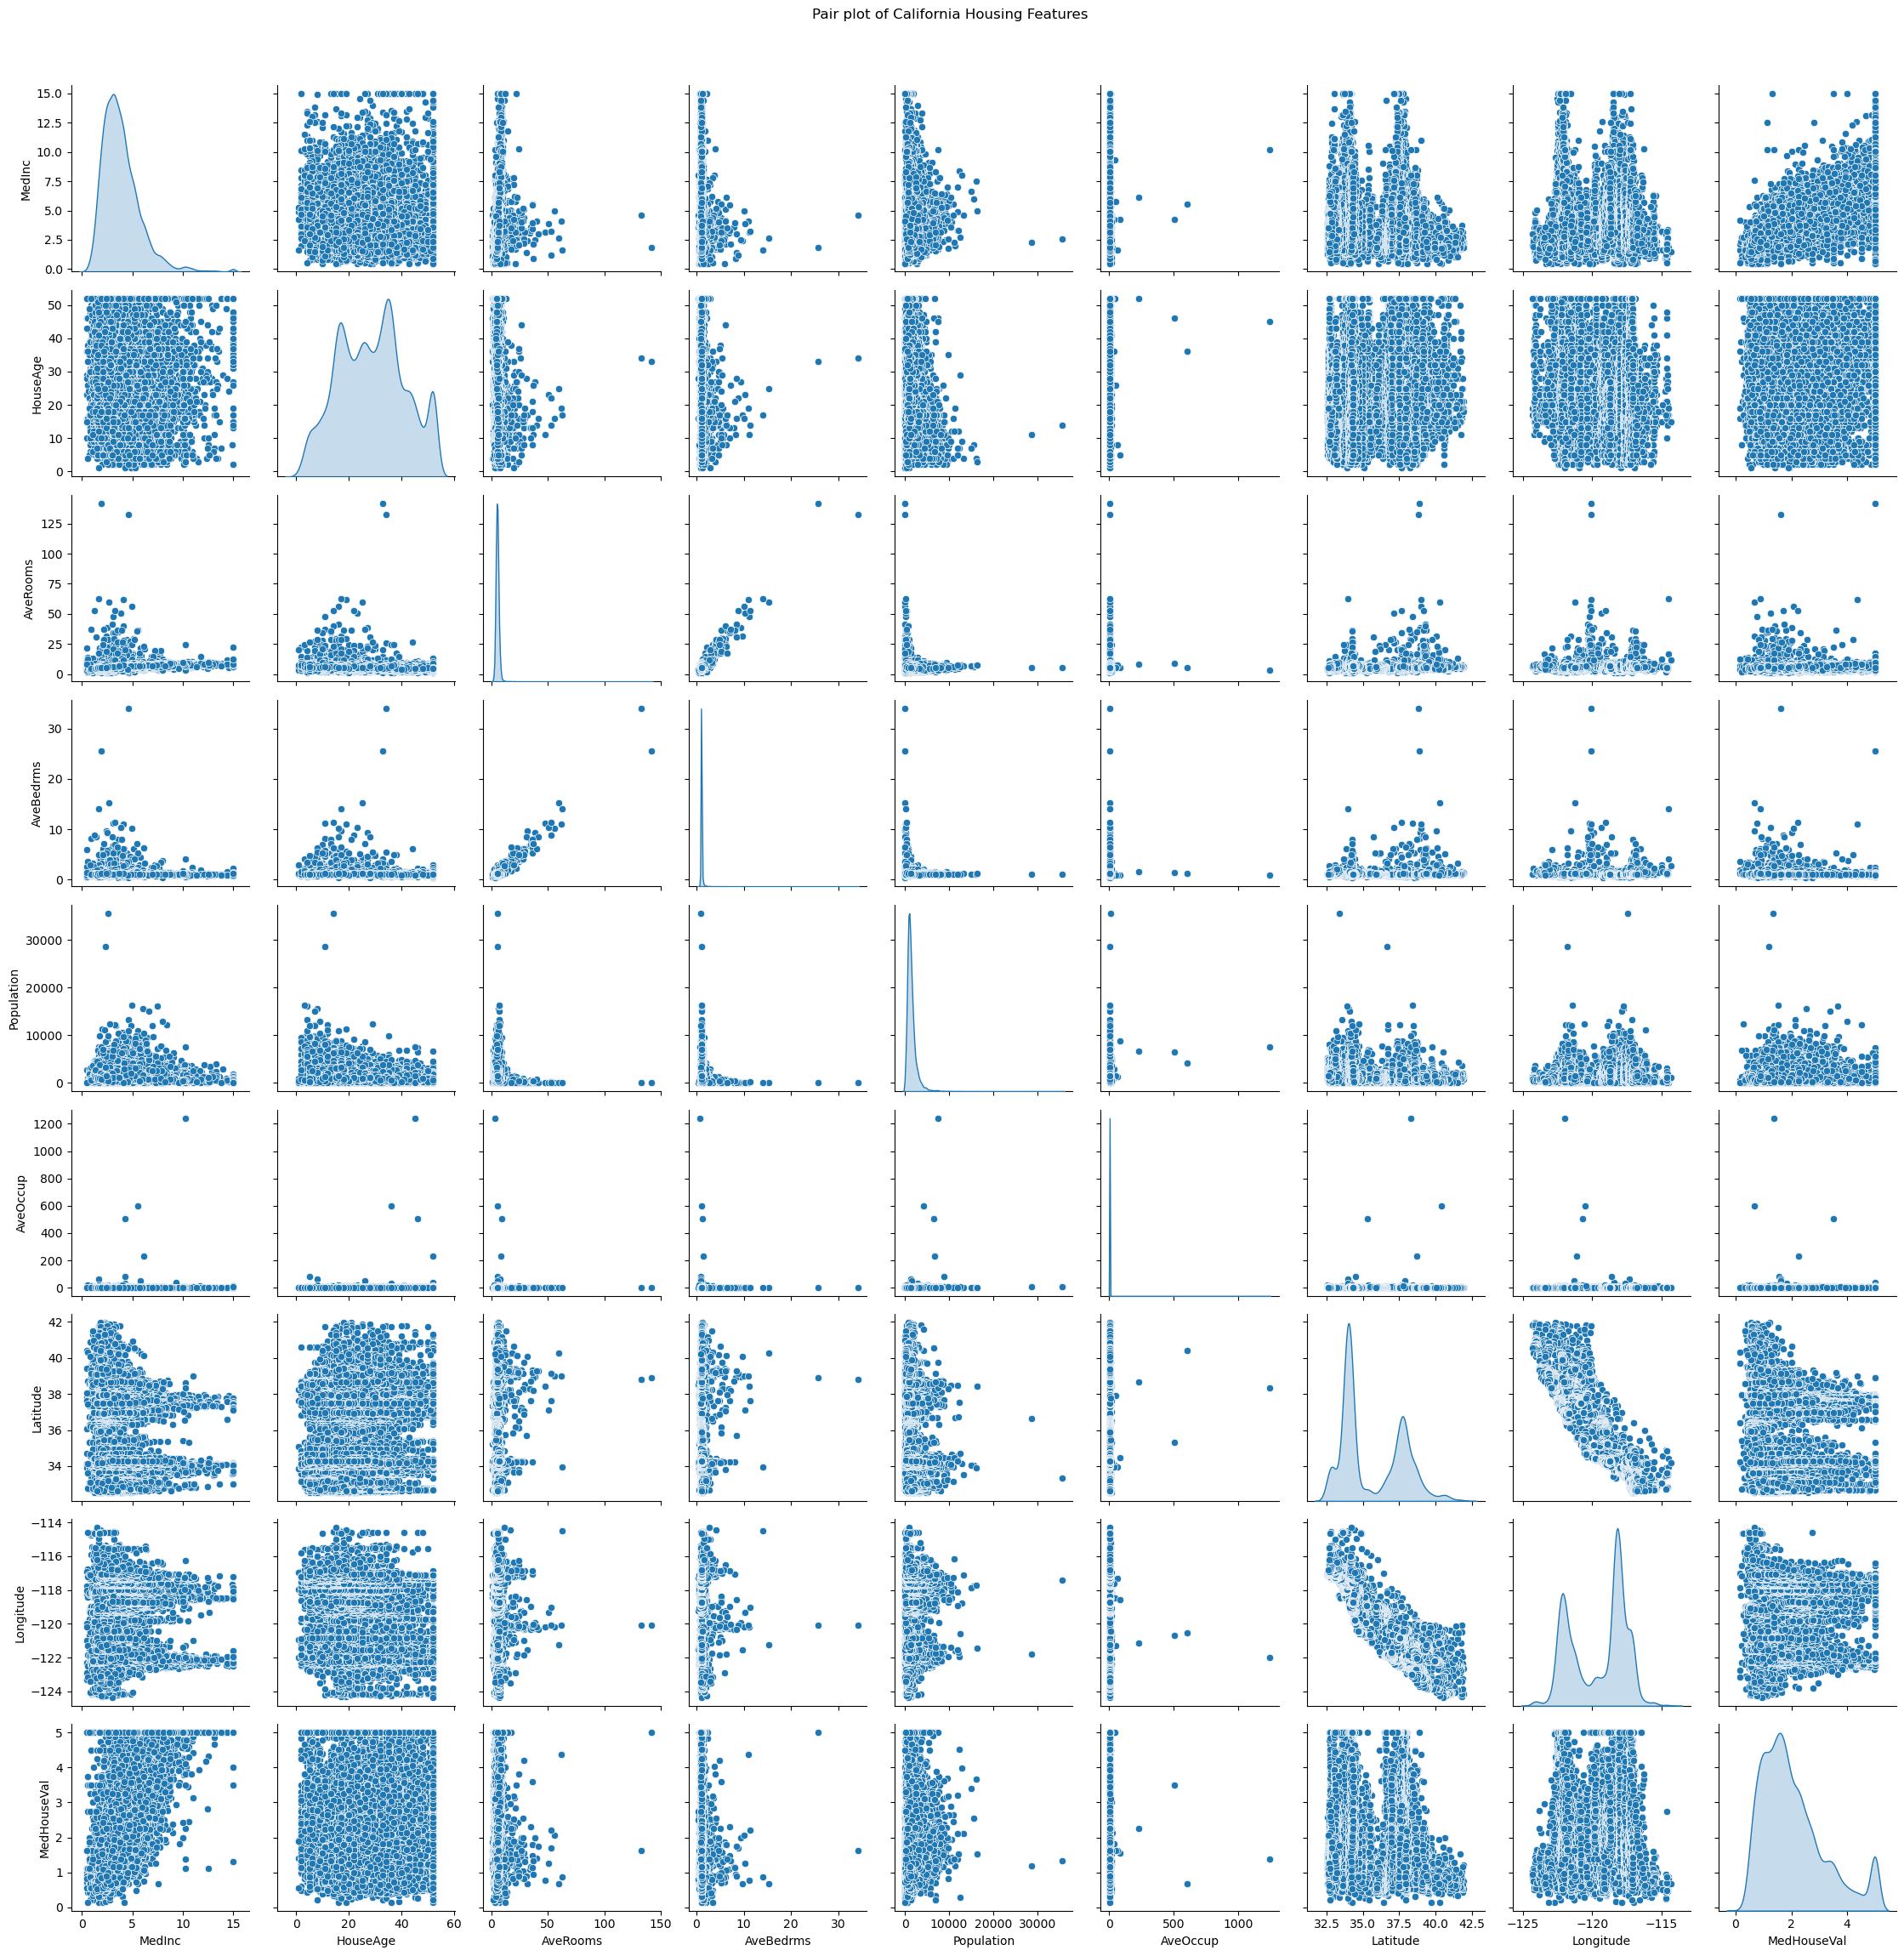

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
housing_df = data.frame

cor_mat = housing_df.corr()

print("Correlation of All features... ")
plt.figure(figsize=(10,6))

sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title("CO relation of all features")
plt.show()

plt.figure(figsize=(18,18))
sns.pairplot(housing_df, diag_kind ='kde')
plt.suptitle("Pair plot of California Housing Features ", y=1.02)
plt.tight_layout()
plt.show()

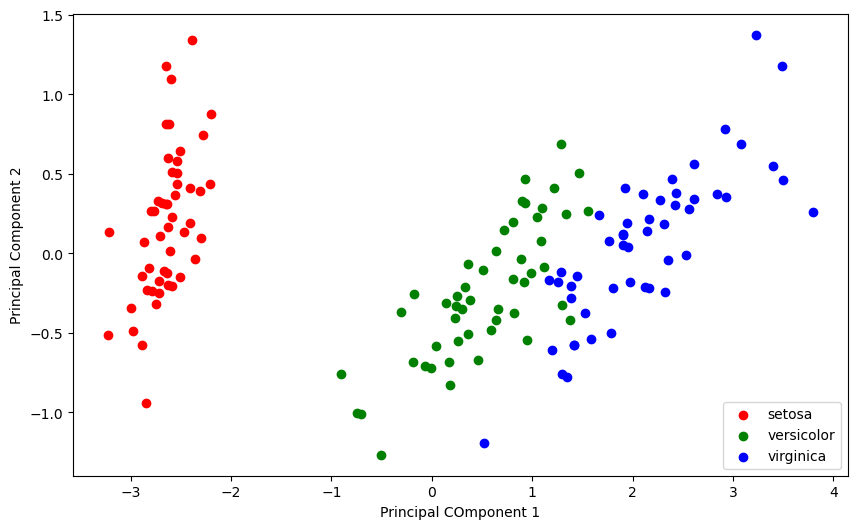

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
data = iris.data
labels = iris.target
label_names = iris.target_names

iris_df = pd.DataFrame(data, columns= iris.feature_names)

pca = PCA(n_components=2)
red_data = pca.fit_transform(data)

red_data_df = pd.DataFrame(red_data, columns=['Principal Component 1', 'Principal Component 2'])
red_data_df['Label'] = labels

colors=['r','g','b']
plt.figure(figsize=(10,6))
for i,label in enumerate(np.unique(labels)):
    plt.scatter(
    red_data_df[red_data_df['Label'] == label]['Principal Component 1'],
    red_data_df[red_data_df['Label'] == label]['Principal Component 2'],
    color= colors[i],
    label = label_names[label]
    )
    plt.xlabel("Principal COmponent 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
plt.show()

In [4]:

import pandas as pd

def find_s_algo(filepath):
    df = pd.read_csv(filepath)
    print("Training Data")
    print(df)
    
    attributes = df.columns[:-1]
    class_label = df.columns[-1]
    
    hypothesis = ['?' for _ in attributes]
    
    for index,row in df.iterrows():
        if row[class_label] == 'Yes':
            if '?' in hypothesis:
                hypothesis = list(row[:-1])
            else:
                for i in range(len(hypothesis)):
                    if hypothesis[i] != row[i]:
                        hypothesis[i] = '?'
            print(f' Step {index} Hypothessi : {hypothesis}')
    return hypothesis
    
filepath= r"C:\Users\priya\Downloads\enjoysport_training_data.csv"
a= find_s_algo(filepath)

print("Finsl")
print(a)

Training Data
     Sky  Temp Humidity    Wind Water Forecast EnjoySport
0  Sunny  Warm   Normal  Strong  Warm     Same        Yes
1  Sunny  Warm     High  Strong  Warm     Same        Yes
2  Rainy  Cold     High  Strong  Warm   Change         No
3  Sunny  Warm     High  Strong  Cool   Change        Yes
4  Sunny  Warm   Normal  Strong  Warm     Same        Yes
 Step 0 Hypothessi : ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
 Step 1 Hypothessi : ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
 Step 3 Hypothessi : ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']
 Step 4 Hypothessi : ['Sunny', 'Warm', '?', 'Strong', '?', '?']
Finsl
['Sunny', 'Warm', '?', 'Strong', '?', '?']


C:\Users\priya\AppData\Local\Temp\ipykernel_18144\2814478196.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if hypothesis[i] != row[i]:


--- k-Nearest Neighbors Classification ---
Training dataset: First 50 points labeled based on the rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)
Testing dataset: Remaining 50 points to be classified

Results for k = 1:
Point x51 (value: 0.8315) is classified as Class2
Point x52 (value: 0.7119) is classified as Class2
Point x53 (value: 0.8829) is classified as Class2
Point x54 (value: 0.0944) is classified as Class1
Point x55 (value: 0.5220) is classified as Class2
Point x56 (value: 0.5214) is classified as Class2
Point x57 (value: 0.0619) is classified as Class1
Point x58 (value: 0.9575) is classified as Class2
Point x59 (value: 0.0785) is classified as Class1
Point x60 (value: 0.7847) is classified as Class2
Point x61 (value: 0.2465) is classified as Class1
Point x62 (value: 0.3355) is classified as Class1
Point x63 (value: 0.0212) is classified as Class1
Point x64 (value: 0.7329) is classified as Class2
Point x65 (value: 0.9480) is classified as Class2
Point x66 (value: 0.2454) is clas

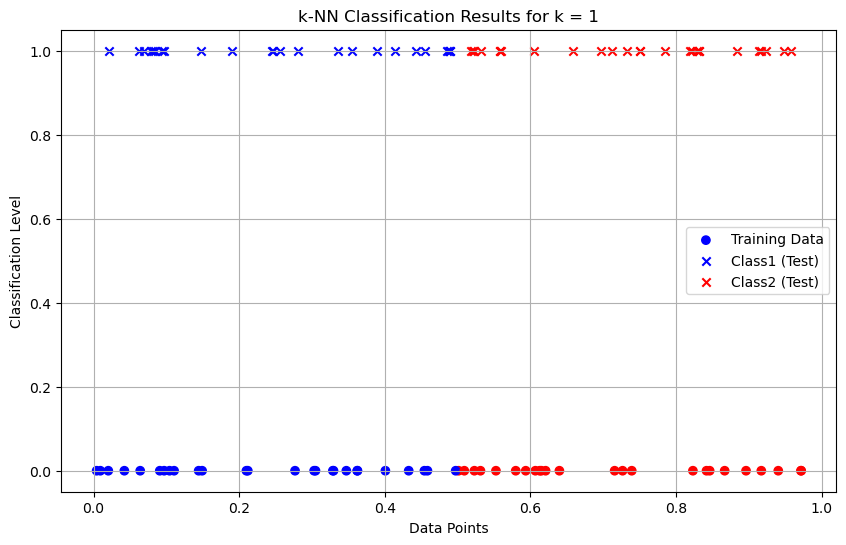

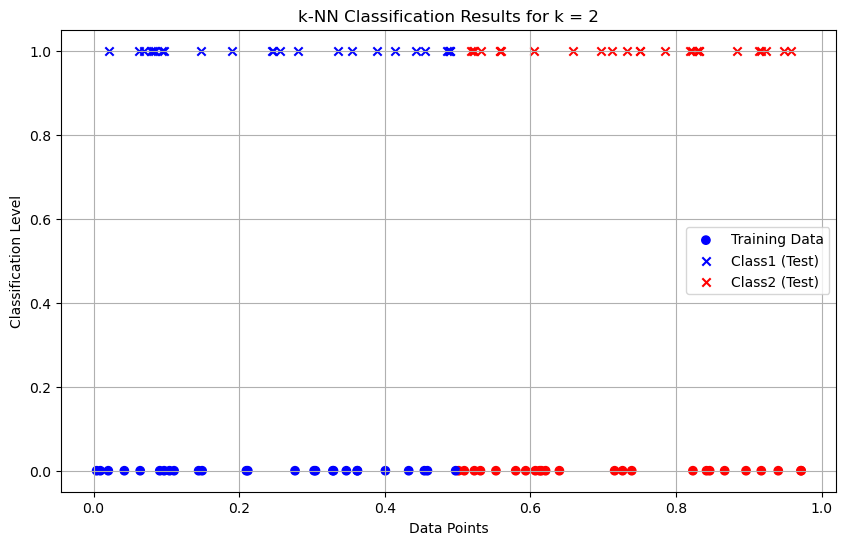

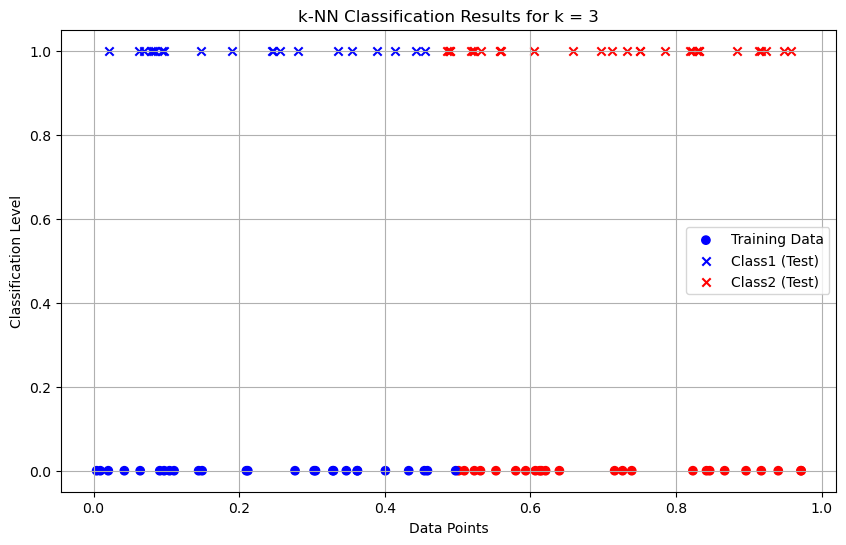

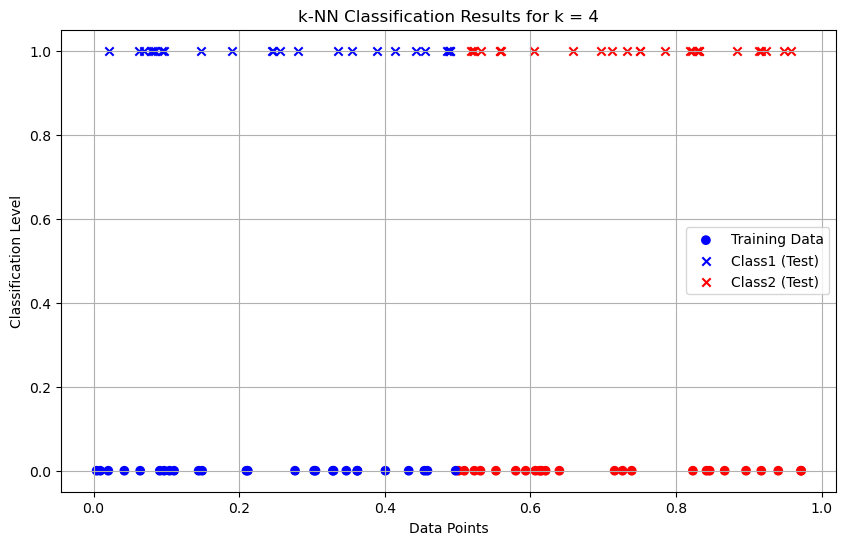

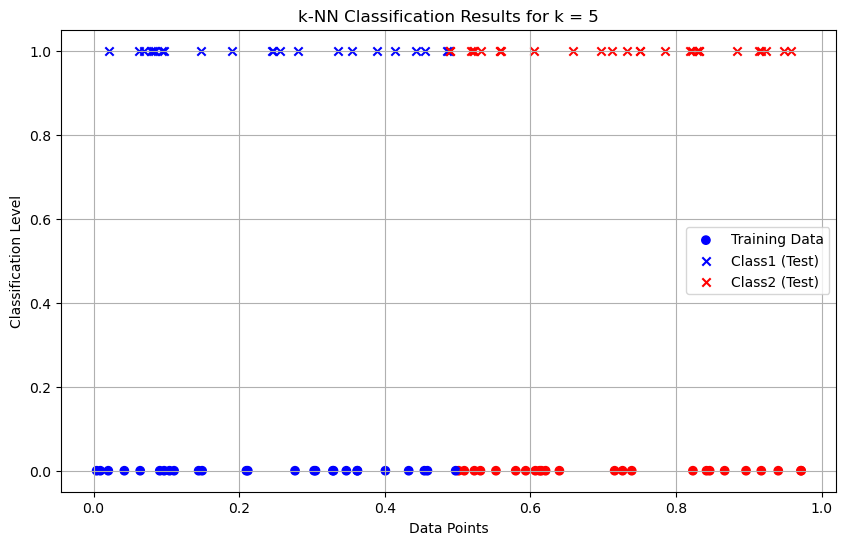

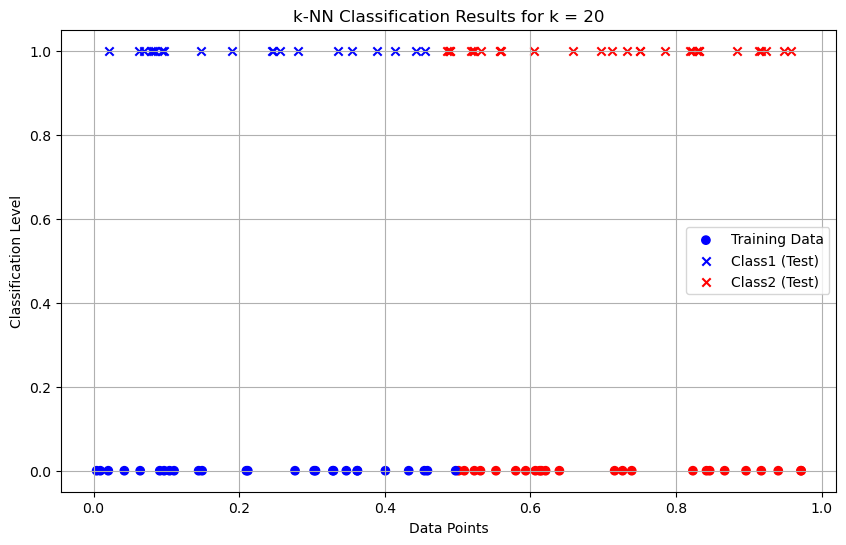

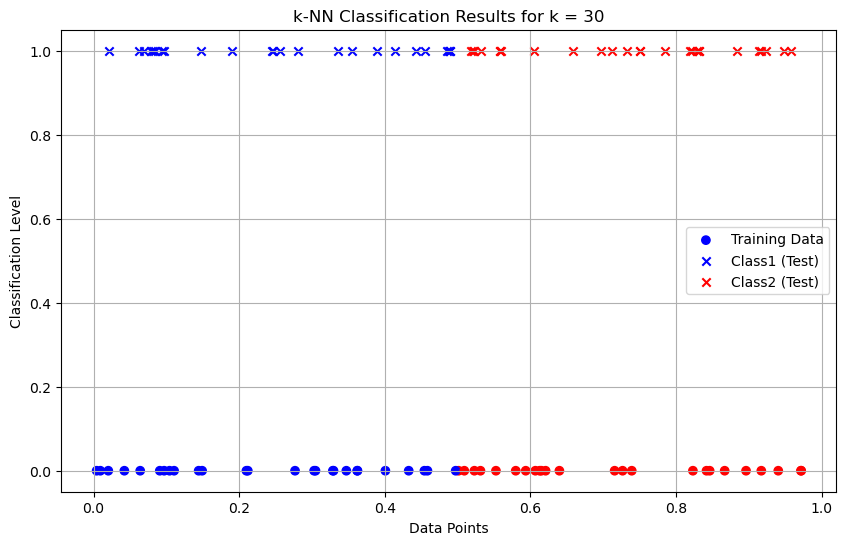

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Generate random data
data = np.random.rand(100)

# Create labels based on data values (First 50 labels)
labels = ["Class1" if x <= 0.5 else "Class2" for x in data[:50]]

# Function to compute Euclidean distance
def euclidean_distance(x1, x2):
    return abs(x1 - x2)

# k-NN classifier function
def knn_classifier(train_data, train_labels, test_point, k):
    distances = [(euclidean_distance(test_point, train_data[i]), train_labels[i]) for i in range(len(train_data))]
    distances.sort(key=lambda x: x[0])  # Sort by distance
    k_nearest_neighbors = distances[:k]  # Get k nearest neighbors
    k_nearest_labels = [label for _, label in k_nearest_neighbors]  # Extract the labels
    return Counter(k_nearest_labels).most_common(1)[0][0]  # Return the most common label

# Prepare the training and test data
train_data = data[:50]  # First 50 points for training
train_labels = labels  # Corresponding labels for training
test_data = data[50:]  # Remaining 50 points for testing

# Values of k to test
k_values = [1, 2, 3, 4, 5, 20, 30]

print("--- k-Nearest Neighbors Classification ---")
print("Training dataset: First 50 points labeled based on the rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)")
print("Testing dataset: Remaining 50 points to be classified\n")

# Store the results for each k value
results = {}

# Loop over different values of k
for k in k_values:
    print(f"Results for k = {k}:")
    classified_labels = [knn_classifier(train_data, train_labels, test_point, k) for test_point in test_data]
    results[k] = classified_labels
    
    # Output the classification results
    for i, label in enumerate(classified_labels, start=51):  # Start index at 51 for test points
        print(f"Point x{i} (value: {test_data[i - 51]:.4f}) is classified as {label}")
    print("\n")

print("Classification complete.\n")

# Visualize the classification results for each k value
for k in k_values:
    classified_labels = results[k]
    class1_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class1"]
    class2_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class2"]

    plt.figure(figsize=(10, 6))
    plt.scatter(train_data, [0] * len(train_data), c=["blue" if label == "Class1" else "red" for label in train_labels],
                label="Training Data", marker="o")
    plt.scatter(class1_points, [1] * len(class1_points), c="blue", label="Class1 (Test)", marker="x")
    plt.scatter(class2_points, [1] * len(class2_points), c="red", label="Class2 (Test)", marker="x")
    plt.title(f"k-NN Classification Results for k = {k}")
    plt.xlabel("Data Points")
    plt.ylabel("Classification Level")
    plt.legend()
    plt.grid(True)
    plt.show()


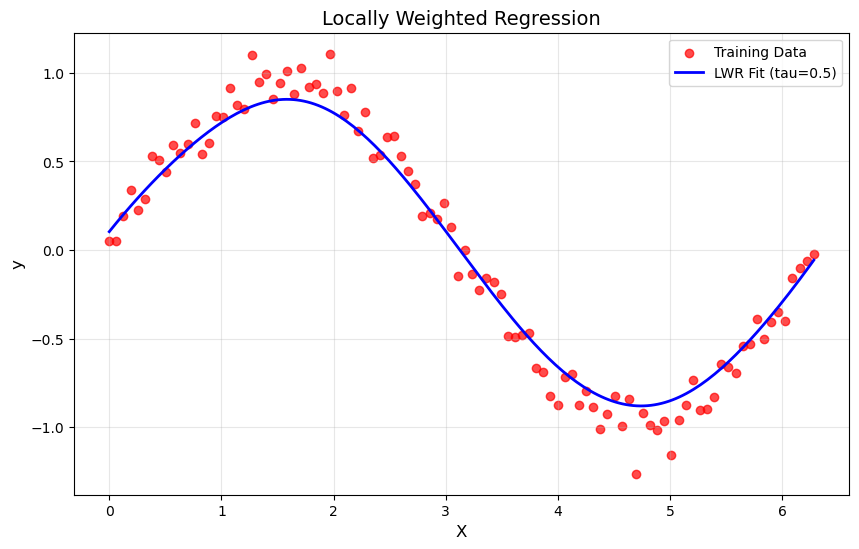

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)]) 
    W = np.diag(weights)
    X_transpose_W = X.T @ W
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y 
    return x @ theta
np.random.seed(42)

X = np.linspace(0, 2 * np.pi, 100)

y = np.sin(X) + 0.1 * np.random.randn(100) 

X_bias = np.c_[np.ones(X.shape), X]

x_test = np.linspace(0, 2 * np.pi, 200)

x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5

y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally Weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3) 
plt.show()

Demonstrating Linear Regression and Polynomial Regression



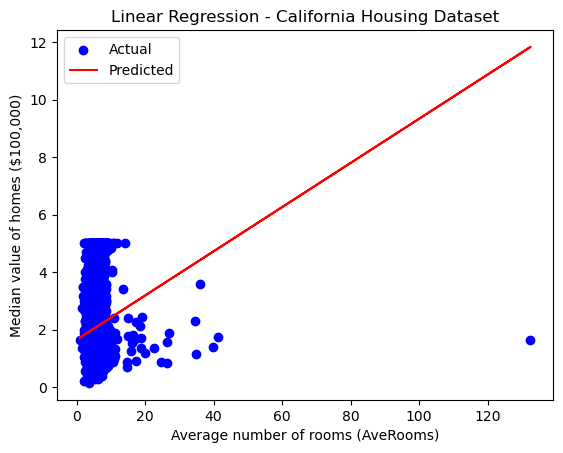


Linear Regression - California Housing Dataset
Mean Squared Error: 1.2923314440807299
R^2 Score: 0.013795337532284901


C:\Users\priya\AppData\Local\Temp\ipykernel_18144\3707917078.py:46: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values="?")


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [7]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Linear Regression for California Housing Dataset
def linear_regression_california():
    housing = fetch_california_housing(as_frame=True)
    X = housing.data[["AveRooms"]]  # Using only AveRooms as feature
    y = housing.target  # Median value of homes as target
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plotting results
    plt.scatter(X_test, y_test, color="blue", label="Actual") 
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Average number of rooms (AveRooms)")
    plt.ylabel("Median value of homes ($100,000)")
    plt.title("Linear Regression - California Housing Dataset") 
    plt.legend()
    plt.show()

    # Print performance metrics
    print("\nLinear Regression - California Housing Dataset") 
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) 
    print("R^2 Score:", r2_score(y_test, y_pred))


# Polynomial Regression for Auto MPG Dataset
def polynomial_regression_auto_mpg():
    # Load the Auto MPG dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
    data = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values="?")
    
    # Drop rows with missing values
    data = data.dropna()

    # Convert feature and target
    X = data["displacement"].values.reshape(-1, 1)  # Feature: displacement
    y = data["mpg"].values  # Target: mpg

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Polynomial Regression model (degree 2)
    poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred = poly_model.predict(X_test)

    # Plotting results
    plt.scatter(X_test, y_test, color="blue", label="Actual") 
    plt.scatter(X_test, y_pred, color="red", label="Predicted", alpha=0.6)
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)") 
    plt.title("Polynomial Regression - Auto MPG Dataset") 
    plt.legend()
    plt.show()

    # Print performance metrics
    print("\nPolynomial Regression - Auto MPG Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


# Call functions only if this is the main file
if __name__ == "__main__":
    print("Demonstrating Linear Regression and Polynomial Regression\n") 
    linear_regression_california()
    polynomial_regression_auto_mpg()


Model Accuracy: 94.74%
Predicted Class for the new sample: Benign


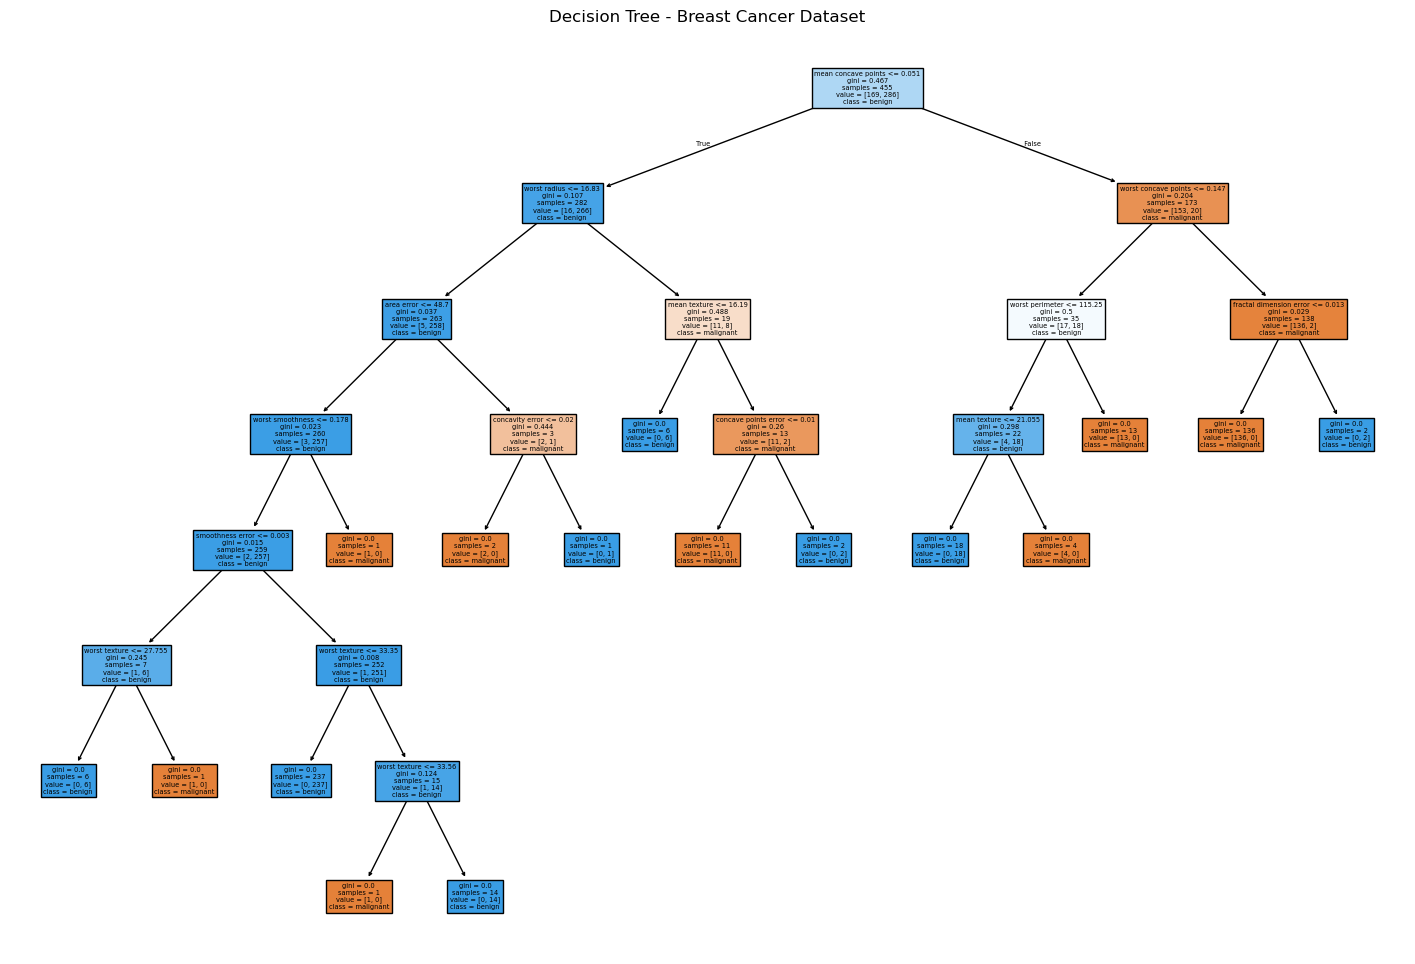

In [8]:
# Importing necessary libraries import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import tree 

data = load_breast_cancer()

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
new_sample = np.array([X_test[0]])
prediction = clf.predict(new_sample)
prediction_class = "Benign" if prediction == 1 else "Malignant" 
print(f"Predicted Class for the new sample: {prediction_class}") 
plt.figure(figsize=(18,12))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree - Breast Cancer Dataset") 
plt.show()

Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.80         2
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1

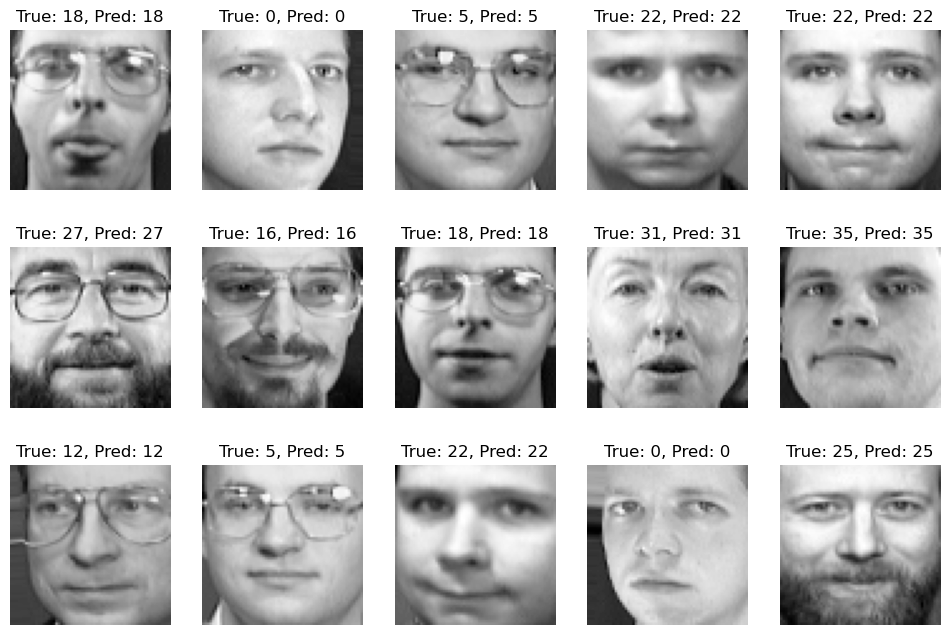

In [9]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import matplotlib.pyplot as plt
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data 
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy * 100:.2f}%') 
print("\nClassification Report:") 
print(classification_report(y_test, y_pred, zero_division=1)) 
print("\nConfusion Matrix:") 
print(confusion_matrix(y_test, y_pred))
cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy') 
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%') 
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred):
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray) 
    ax.set_title(f"True: {label}, Pred: {prediction}")
    ax.axis('off')
plt.show()

Confusion Matrix:
[[ 36 176]
 [339  18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.17      0.12       212
           1       0.09      0.05      0.07       357

    accuracy                           0.09       569
   macro avg       0.09      0.11      0.09       569
weighted avg       0.09      0.09      0.09       569



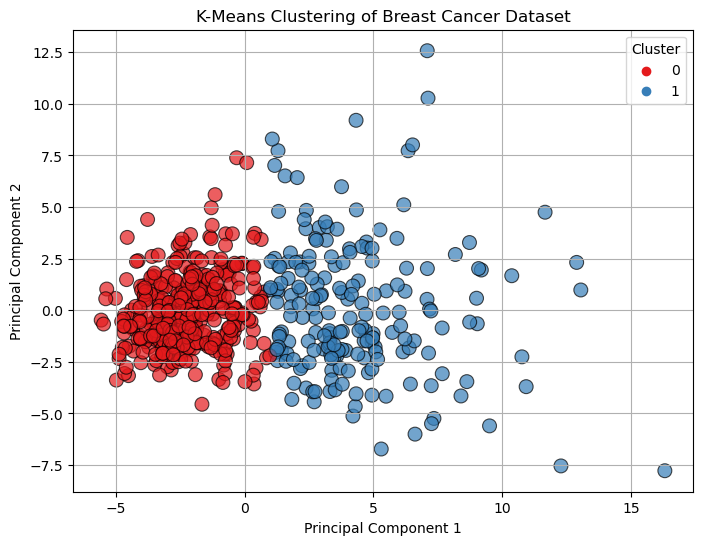

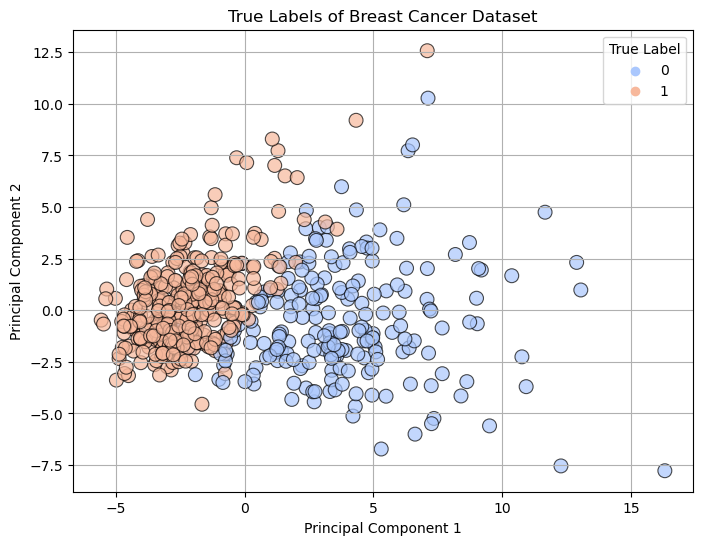

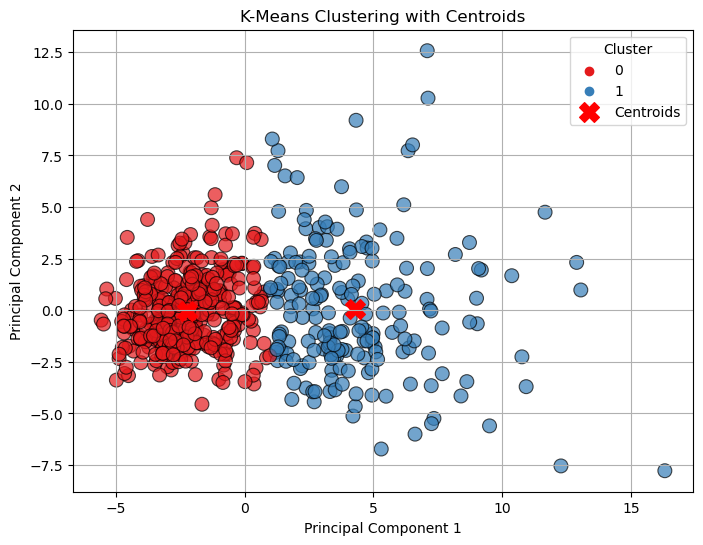

In [10]:
import os
# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"
# os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
# os.environ["NUMEXPR_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Evaluation with confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y, y_kmeans))
print("\nClassification Report:")
print(classification_report(y, y_kmeans))

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y

# Scatter plot by cluster label
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1',s=100, edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Scatter plot by true label
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True Label', palette='coolwarm', s=100, edgecolor='black', alpha=0.7)
plt.title('True Labels of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="True Label")
plt.grid(True)
plt.show()

# Scatter plot with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
